In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir datasets

In [3]:
!unzip /content/drive/MyDrive/SPARK_AIVLE/dataset.zip -d /content/datasets

Archive:  /content/drive/MyDrive/SPARK_AIVLE/dataset.zip
  inflating: /content/datasets/answer_sample.csv  
  inflating: /content/datasets/test_data.csv  
  inflating: /content/datasets/train_data.csv  


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
df = pd.read_csv('./datasets/train_data.csv')

df_copy = df.copy()

df.head()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,1.59,41.00,0.7,20.53,1680.0,58.67,2.93,0
1,2.97,59.28,0.7,38.40,3142.0,74.91,3.75,0
2,1.91,45.29,0.7,24.73,2023.0,62.48,3.12,0
3,2.37,51.33,0.7,30.63,2506.0,67.84,3.39,0
4,1.90,45.21,0.7,24.65,2017.0,62.41,3.12,0


In [ ]:
# df_copy['log10_air_inflow'] = np.log10(df.air_inflow + 0.00001)
# df_copy['log10_motor_current'] = np.log10(df.motor_current + 0.00001)
# df_copy['log10_motor_vibe'] = np.log10(df.motor_vibe + 0.00001)

In [ ]:
# df.columns

In [ ]:
# df_copy = df_copy.loc[:, ['air_end_temp', 'out_pressure','motor_rpm',
#                      'motor_temp', 'type', 'log10_air_inflow',
#                     'log10_motor_current', 'log10_motor_vibe']]

In [ ]:
# df_copy.columns

In [162]:
# read & manipulate data
import pandas as pd 
import numpy as np
import tensorflow as tf

# visualisations
import matplotlib.pyplot as plt
import seaborn as sns


# misc
import random as rn

# load the dataset
df = df

# manual parameters
RANDOM_SEED = 42
TRAINING_SAMPLE = len(df)
VALIDATE_SIZE = 0.2

# setting random seeds for libraries to ensure reproducibility
np.random.seed(RANDOM_SEED)
rn.seed(RANDOM_SEED)

In [163]:
# 설비 번호 [0, 4, 5, 6, 7]: 30HP(마력)
# 설비 번호 1: 20HP
# 설비 번호 2: 10HP
# 설비 번호 3: 50HP

mapping = {0:1, 1:1, 2:0, 3:1, 4:1, 5:1, 6:1, 7:1}

df['label'] = df['type'].map(mapping)
df_copy['label'] = df['label']
df

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,label
0,1.59,41.00,0.7,20.53,1680.0,58.67,2.93,0,1
1,2.97,59.28,0.7,38.40,3142.0,74.91,3.75,0,1
2,1.91,45.29,0.7,24.73,2023.0,62.48,3.12,0,1
3,2.37,51.33,0.7,30.63,2506.0,67.84,3.39,0,1
4,1.90,45.21,0.7,24.65,2017.0,62.41,3.12,0,1
...,...,...,...,...,...,...,...,...,...
2458,2.28,50.20,0.7,29.53,2416.0,66.84,3.34,7,1
2459,2.04,46.94,0.7,26.34,2155.0,63.94,3.20,7,1
2460,1.19,35.74,0.7,15.39,1259.0,53.99,2.70,7,1
2461,1.21,36.00,0.7,15.64,1280.0,54.22,2.71,7,1


In [164]:
df['label'].value_counts()

1    2097
0     366
Name: label, dtype: int64

In [165]:
from imblearn.over_sampling import SMOTE, ADASYN

X = df.drop('label', axis=1)
y = df.loc[:,'label']

# SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

df = pd.concat([X_resampled, y_resampled], axis=1)

df
# # ADASYN
# adasyn = ADASYN()
# X_resampled, y_resampled = adasyn.fit_resample(X, y)

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,label
0,1.590000,41.000000,0.7,20.530000,1680.000000,58.670000,2.930000,0,1
1,2.970000,59.280000,0.7,38.400000,3142.000000,74.910000,3.750000,0,1
2,1.910000,45.290000,0.7,24.730000,2023.000000,62.480000,3.120000,0,1
3,2.370000,51.330000,0.7,30.630000,2506.000000,67.840000,3.390000,0,1
4,1.900000,45.210000,0.7,24.650000,2017.000000,62.410000,3.120000,0,1
...,...,...,...,...,...,...,...,...,...
4189,0.750000,50.534166,0.7,11.921666,2682.333255,66.803749,2.790000,2,0
4190,0.450000,37.328306,0.7,7.224094,1626.023524,55.066259,2.206024,2,0
4191,0.802377,53.176146,0.7,12.859508,2894.139219,69.153769,2.910000,2,0
4192,0.360000,33.235492,0.7,5.773648,1298.639351,51.430943,2.020000,2,0


In [166]:
df['label'].value_counts()

1    2097
0    2097
Name: label, dtype: int64

In [167]:
# manual parameter 
RATIO_TO_FRAUD = 15

# splitting by class
fraud = df[df.label == 1]
clean = df[df.label == 0]

# concatenate with fraud transactions into a single dataframe
visualisation_initial = pd.concat([fraud, clean])
column_names = list(visualisation_initial.drop('label', axis=1).columns)

# isolate features from labels 
features, labels = visualisation_initial.drop('label', axis=1).values, \
                   visualisation_initial.label.values

# splitting by class
fraud_copy = df_copy[df_copy.label == 1]
clean_copy = df_copy[df_copy.label == 0]

# concatenate with fraud transactions into a single dataframe
visualisation_initial_copy = pd.concat([fraud_copy, clean_copy])
column_names_copy = list(visualisation_initial_copy.drop('label', axis=1).columns)

# isolate features from labels 
features_copy, labels_copy = visualisation_initial_copy.drop('label', axis=1).values, \
                   visualisation_initial_copy.label.values

In [ ]:
# from sklearn.manifold import TSNE
# from mpl_toolkits.mplot3d import Axes3D

# def tsne_scatter(features, labels, dimensions=2, save_as='graph.png'):
#     if dimensions not in (2, 3):
#         raise ValueError('tsne_scatter can only plot in 2d or 3d (What are you? An alien that can visualise >3d?). Make sure the "dimensions" argument is in (2, 3)')

#     # t-SNE dimensionality reduction
#     features_embedded = TSNE(n_components=dimensions, random_state=RANDOM_SEED).fit_transform(features)
    
#     # initialising the plot
#     fig, ax = plt.subplots(figsize=(8,8))
    
#     # counting dimensions
#     if dimensions == 3: ax = fig.add_subplot(111, projection='3d')

#     # plotting data
#     ax.scatter(
#         *zip(*features_embedded[np.where(labels==1)]),
#         marker='o',
#         color='r',
#         s=2,
#         alpha=0.7,
#         label='Fraud'
#     )
#     ax.scatter(
#         *zip(*features_embedded[np.where(labels==0)]),
#         marker='o',
#         color='g',
#         s=2,
#         alpha=0.3,
#         label='Clean'
#     )

#     # storing it to be displayed later
#     plt.legend(loc='best')
#     plt.savefig(save_as);
#     plt.show;

# tsne_scatter(features, labels, dimensions=3, save_as='tsne_initial_2d.png')
# tsne_scatter(features_copy, labels_copy, dimensions=2, save_as='tsne_initial_2d_logits.png')

In [168]:
clean.shape, fraud.shape

((2097, 9), (2097, 9))

In [169]:
X_train = clean.drop('label', axis=1)

fraud = clean.iloc[-50:].append(fraud).sample(frac=1)

<ipython-input-169-11c4cb936fe0>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fraud = clean.iloc[-50:].append(fraud).sample(frac=1)


In [170]:
X_train.shape, fraud.shape

((2097, 8), (2147, 9))

In [171]:
from sklearn.model_selection import train_test_split

# X_train, X_val = train_test_split(X_train, test_size=0.1,
#                                   random_state=RANDOM_SEED)

X_test, y_test = fraud.drop('label', axis=1).values, fraud.label.values

In [172]:
X_train.shape, X_test.shape

((2097, 8), (2147, 8))

In [173]:
from sklearn.preprocessing import Normalizer, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline

# configure our pipeline
pipeline = Pipeline([('normalizer', Normalizer()),
                     ('scaler', RobustScaler())])

In [174]:
# get normalization parameters by fitting to the training data
pipeline.fit(X_train);

In [175]:
# transform the training and validation data with these parameters
X_train_transformed = pipeline.transform(X_train)
# X_validate_transformed = pipeline.transform(X_val)

In [176]:
tf.keras.backend.clear_session()

# data dimensions // hyperparameters 
input_dim = X_train_transformed.shape[1]
BATCH_SIZE = 16
EPOCHS = 100

# https://keras.io/layers/core/
autoencoder = tf.keras.models.Sequential([
    
    # deconstruct / encode
    tf.keras.layers.Dense(input_dim, activation='elu', input_shape=(input_dim, )),
    #tf.keras.layers.Dense(16, activation='elu'), 
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(3, activation='elu'),
    
    # reconstruction / decode
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    #tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dense(input_dim, activation='elu')
    
])

# https://keras.io/api/models/model_training_apis/
autoencoder.compile(optimizer="adam", 
                    loss="mse",
                    metrics=["acc"])

# print an overview of our model
autoencoder.summary();

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 3)                 15        
                                                                 
 dense_4 (Dense)             (None, 4)                 16        
                                                                 
 dense_5 (Dense)             (None, 8)                 40        
                                                                 
 dense_6 (Dense)             (None, 8)                 7

In [177]:
# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True
)

In [178]:
history = autoencoder.fit(
    X_train_transformed, X_train_transformed,
    shuffle=True,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    # callbacks=[early_stop],
    # validation_data=(X_validate_transformed, X_validate_transformed)
);

Epoch 1/100
132/132 [==============================] - 1s 2ms/step - loss: 0.2516 - acc: 0.3271
Epoch 2/100
132/132 [==============================] - 0s 2ms/step - loss: 0.1286 - acc: 0.5069
Epoch 3/100
132/132 [==============================] - 0s 2ms/step - loss: 0.1145 - acc: 0.5055
Epoch 4/100
132/132 [==============================] - 0s 2ms/step - loss: 0.1017 - acc: 0.5179
Epoch 5/100
132/132 [==============================] - 0s 2ms/step - loss: 0.0860 - acc: 0.5303
Epoch 6/100
132/132 [==============================] - 0s 2ms/step - loss: 0.0769 - acc: 0.5503
Epoch 7/100
132/132 [==============================] - 0s 2ms/step - loss: 0.0721 - acc: 0.5618
Epoch 8/100
132/132 [==============================] - 0s 2ms/step - loss: 0.0687 - acc: 0.5675
Epoch 9/100
132/132 [==============================] - 0s 2ms/step - loss: 0.0654 - acc: 0.5784
Epoch 10/100
132/132 [==============================] - 0s 2ms/step - loss: 0.0608 - acc: 0.6066
Epoch 11/100
132/132 [=================

In [179]:
# transform the test set with the pipeline fitted to the training set
X_test_transformed = pipeline.transform(X_test)

# pass the transformed test set through the autoencoder to get the reconstructed result
reconstructions = autoencoder.predict(X_test_transformed)

45/68 [==================>...........] - ETA: 0s

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Normalizer was fitted with feature names
  warnings.warn(


68/68 [==============================] - 0s 1ms/step


In [180]:
# calculating the mean squared error reconstruction loss per row in the numpy array
mse = np.mean(np.power(X_test_transformed - reconstructions, 2), axis=1)

In [181]:
clean.shape, fraud.shape

((2097, 9), (2147, 9))

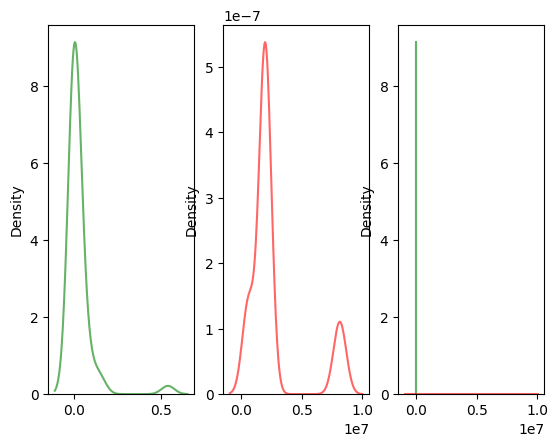

In [182]:
clean = mse[y_test==0]
fraud = mse[y_test==1]

plt.subplot(1,3,1)
sns.kdeplot(clean, label='clean', alpha=.6, color='green')
plt.subplot(1,3,2)
sns.kdeplot(fraud, label='fraud', alpha=.6, color='red')
plt.subplot(1,3,3)
sns.kdeplot(clean, label='clean', alpha=.6, color='green')
sns.kdeplot(fraud, label='fraud', alpha=.6, color='red')
plt.show()

In [183]:
clean.max(), fraud.min()

(0.5389670959086207, 561372.5903364955)

## VAE 버전

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.losses import mse, binary_crossentropy
from tensorflow.keras.datasets import mnist
import numpy as np

In [ ]:
# 모델 구성
input_dim = 8
hidden_dim = 4
latent_dim = 2

tf.keras.backend.clear_session()

inputs = Input(shape=(input_dim,), name='encoder_input')
x = Dense(hidden_dim, activation='elu')(inputs)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

# VAE sampling
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=1.)
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# 인코더
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')

# 디코더
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(hidden_dim, activation='elu')(latent_inputs)
outputs = Dense(input_dim, activation='elu')(x)
decoder = Model(latent_inputs, outputs, name='decoder')

# 엔드투엔드 VAE 모델
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae')

# 손실 함수
reconstruction_loss = binary_crossentropy(inputs, outputs)
reconstruction_loss *= input_dim
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)

vae.compile(optimizer='adam')

In [ ]:
# 모델 학습
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',
                   patience=10,
                   restore_best_weights=True,
                   min_delta=0,
                   verbose=1)
vae.fit(X_train_transformed, validation_split=.2, callbacks=[es], epochs=100, batch_size=16)

In [ ]:
# transform the test set with the pipeline fitted to the training set
X_test_transformed = pipeline.transform(X_test)

# pass the transformed test set through the autoencoder to get the reconstructed result
reconstructions = vae.predict(X_test_transformed)

In [ ]:
# calculating the mean squared error reconstruction loss per row in the numpy array
mse = np.mean(np.power(X_test_transformed - reconstructions, 2), axis=1)

In [ ]:
clean = mse[y_test==0]
fraud = mse[y_test==1]

plt.subplot(1,2,1)
plt.hist(clean, bins=50, density=True, label='clean', alpha=.6, color='green')
plt.subplot(1,2,2)
plt.hist(fraud, bins=50, density=True, label='fraud', alpha=.6, color='red')
plt.show()

In [ ]:
clean.max(), fraud.min()

In [ ]:
autoencoder.save('/content/drive/MyDrive/SPARK_AIVLE/models/model_10.h5')

In [184]:
test_data = pd.read_csv('/content/drive/MyDrive/SPARK_AIVLE/test_data_dim_2_train_all/test_30_20_50.csv')

test_data.head()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,label
0,2.51,53.28,0.7,32.54,2662.0,69.58,3.48,0,0
1,2.66,55.24,0.7,34.45,2819.0,71.32,3.57,0,0
2,1.72,42.74,0.7,22.23,1819.0,60.21,3.01,0,0
3,2.20,49.15,0.7,28.50,2332.0,65.91,3.30,0,0
4,2.06,47.28,0.7,26.67,2182.0,64.24,3.21,0,0


In [185]:
cond = (test_data['type'] == 2)
X_test = test_data.loc[cond, :].drop('label', axis=1)

In [186]:
len(X_test)

1098

In [187]:
# transform the test set with the pipeline fitted to the training set
X_test_transformed = pipeline.transform(X_test)

# pass the transformed test set through the autoencoder to get the reconstructed result
reconstructions = autoencoder.predict(X_test_transformed)

35/35 [==============================] - 0s 1ms/step


In [188]:
# calculating the mean squared error reconstruction loss per row in the numpy array
mse = np.mean(np.power(X_test_transformed - reconstructions, 2), axis=1)

In [65]:
# sns.histplot(mse)
# plt.show()

<Axes: >

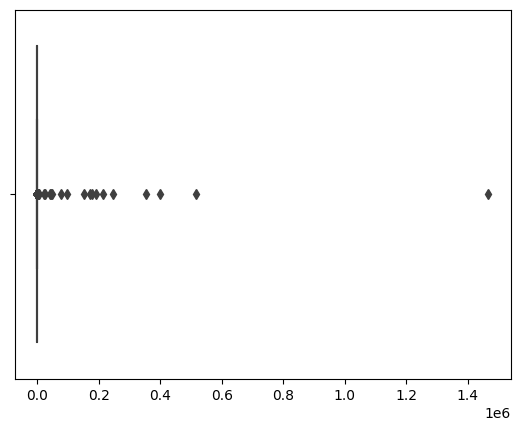

In [189]:
sns.boxplot(x=mse)

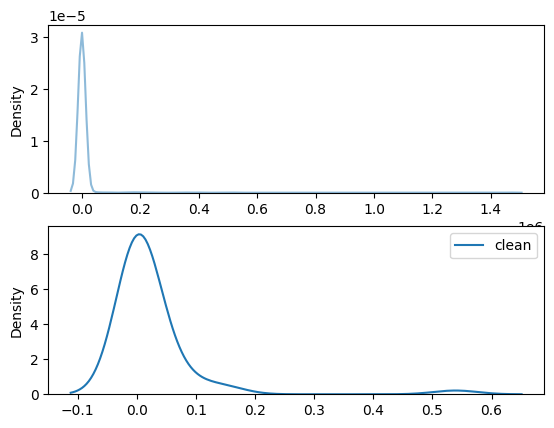

In [190]:
plt.subplot(2,1,1)
sns.kdeplot(mse, label='test', alpha=0.5)
plt.subplot(2,1,2)
sns.kdeplot(clean, label='clean')
plt.legend()
plt.show()

In [191]:
threshold = clean.mean() + clean.std() * 3

threshold

0.2678268641505367

In [192]:
pd.DataFrame(mse).sort_values(by=0, ascending=False)[:80]

,0
262,1.466962e+06
261,5.152666e+05
259,4.001494e+05
252,3.544565e+05
264,2.463618e+05
...,...
1065,1.502924e-01
312,1.479882e-01
913,1.478604e-01
866,1.397209e-01


In [193]:
test_data.loc[cond, 'label'] = np.where(mse > threshold, 1, 0)

In [194]:
test_data.to_csv('/content/drive/MyDrive/SPARK_AIVLE/test_data_dim_2_train_all/test_30_20_50_10.csv', index=False)

In [195]:
submit = pd.read_csv('/content/datasets/answer_sample.csv')

submit

,type,label
0,0,-1
1,0,-1
2,0,-1
3,0,-1
4,0,-1
...,...,...
7384,7,-1
7385,7,-1
7386,7,-1
7387,7,-1


In [196]:
test_data['label'].value_counts()

0    7027
1     362
Name: label, dtype: int64

In [ ]:
# test_data['label'].value_counts()

In [197]:
submit['label'] = test_data['label']

In [198]:
submit.to_csv('/content/drive/MyDrive/SPARK_AIVLE/test_data_dim_2_train_all/submit.csv')

In [199]:
semi_df = test_data.loc[(test_data['type'] == 4) & (test_data['label'] == 0), :]

semi_df.shape

(912, 9)

In [111]:
df = pd.concat((df, semi_df), axis=0)